In [1]:
library(pdftools)
readpage<- pdf_convert('M:\\Imarticus\\ProjectR\\Text mining\\Datafiles\\Teaching sports.pdf',
                       pages=15:25)
text<- tesseract::ocr(readpage)

Converting page 15 to Teaching sports_15.png... done!
Converting page 16 to Teaching sports_16.png... done!
Converting page 17 to Teaching sports_17.png... done!
Converting page 18 to Teaching sports_18.png... done!
Converting page 19 to Teaching sports_19.png... done!
Converting page 20 to Teaching sports_20.png... done!
Converting page 21 to Teaching sports_21.png... done!
Converting page 22 to Teaching sports_22.png... done!
Converting page 23 to Teaching sports_23.png... done!
Converting page 24 to Teaching sports_24.png... done!
Converting page 25 to Teaching sports_25.png... done!


In [2]:
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")
library(tidytext)
library(dplyr)
data(stop_words)

Loading required package: NLP
Loading required package: RColorBrewer

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
library(stringr)
textnew<- str_replace_all(text, "[[:punct:]]", " ")
textnew<-str_replace_all(textnew, "[^[:alnum:]]", " ")

In [4]:
var <- Corpus(VectorSource(textnew))

# Convert the text to lower case
var <- tm_map(var, content_transformer(tolower))
# Remove numbers
var <- tm_map(var, removeNumbers)
# Remove english common stopwords
var <- tm_map(var, removeWords, stopwords("english"))

# Remove own stop word
var <- tm_map(var, removeWords,c("ofthe","tothe","ist","ean","injury", 
                                 "itis","top","aid","type","tobe","eft","unt",
                                 "mini","fom","tha","ned","red","hips","wal","ice","bag", 
                                 "warm","water","est","slow","toa","atthe","onthe","draw",
                                 "rest","ring","cool","minor","forthe","ifthe","ther","cut",
                                 "toa","avoid","etal","bags","ora","paper","skin","note",
                                 "balls","time","stop","sisal","ofthis","size","frst","wth",
                                 "space","follow","bibs","willbe","bythe","ifthey","simple",
                                 "remember","usea","bean","plan","conto","head","hold",
                                 "form","approximately","commands","stat","suchas","required",
                                 "foot","aballbasic","grid","gee","standard","branches",
                                 "starting","andthe","sis","wih","items","ata","font",
                                 "short","suggest","tothe","safe","wood","hand",
                                 "tems","sock","floor","support","immediately","tomake","quickly",
                                 "canbe","forexample","keeping","prevent","rise","shown","attached",
                                 "markers","material","clothing","contact","dealing","inthe","cloth",
                                 "clas","meale","eta","ein","tsay","ofan","nat","ina","bea")) 
# Remove punctuations
var <- tm_map(var, removePunctuation)
# Eliminate extra white spaces
var <- tm_map(var, stripWhitespace)


Warning message in tm_map.SimpleCorpus(var, content_transformer(tolower)):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(var, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(var, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(var, removeWords, c("ofthe", "tothe", "ist", :
"transformation drops documents"Warning message in tm_map.SimpleCorpus(var, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(var, stripWhitespace):
"transformation drops documents"

In [6]:
dtm <- TermDocumentMatrix(var)
matrix <- as.matrix(dtm)
sorted_sum <- sort(rowSums(matrix),decreasing=TRUE)
table <- data.frame(word = names(sorted_sum ),freq=sorted_sum )
table <- table %>% anti_join(stop_words)

Joining, by = "word"
Warning message:
"Column `word` joining factor and character vector, coercing into character vector"

In [11]:
top50_words<-head(table,50)
top50_words

word,freq
students,14
injuries,12
games,11
session,11
body,10
ball,9
equipment,9
stretch,8
ground,7
posts,7



Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate



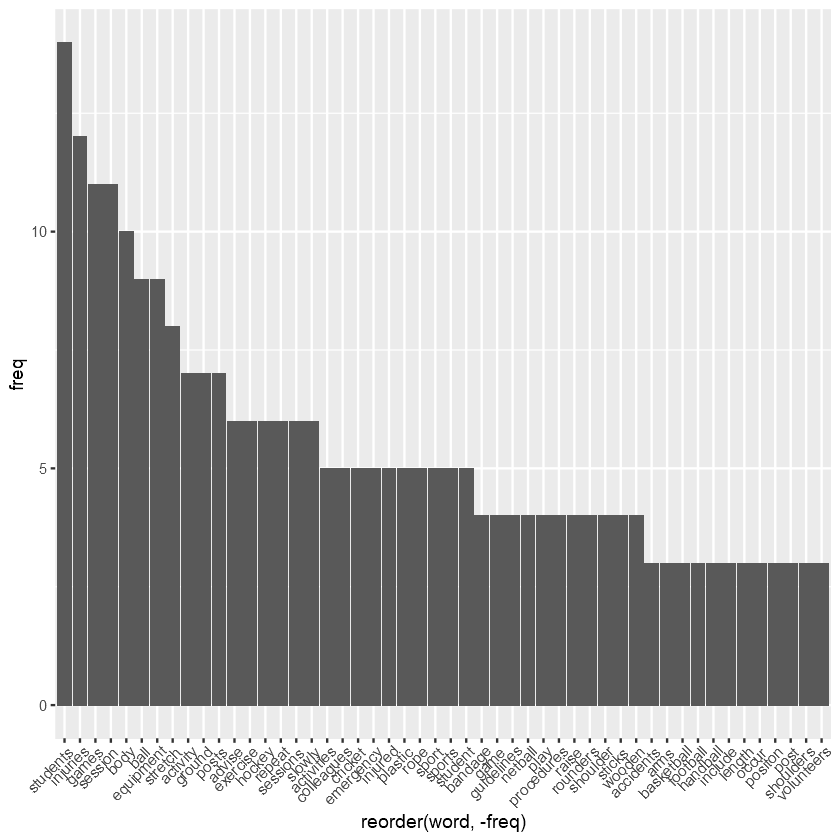

In [12]:
library(ggplot2)
 ggplot(top50_words, aes(x= reorder(word, -freq), y = freq)) +
  geom_bar(stat = "identity")+ 
 theme(axis.text.x=element_text(angle=45, hjust=1))

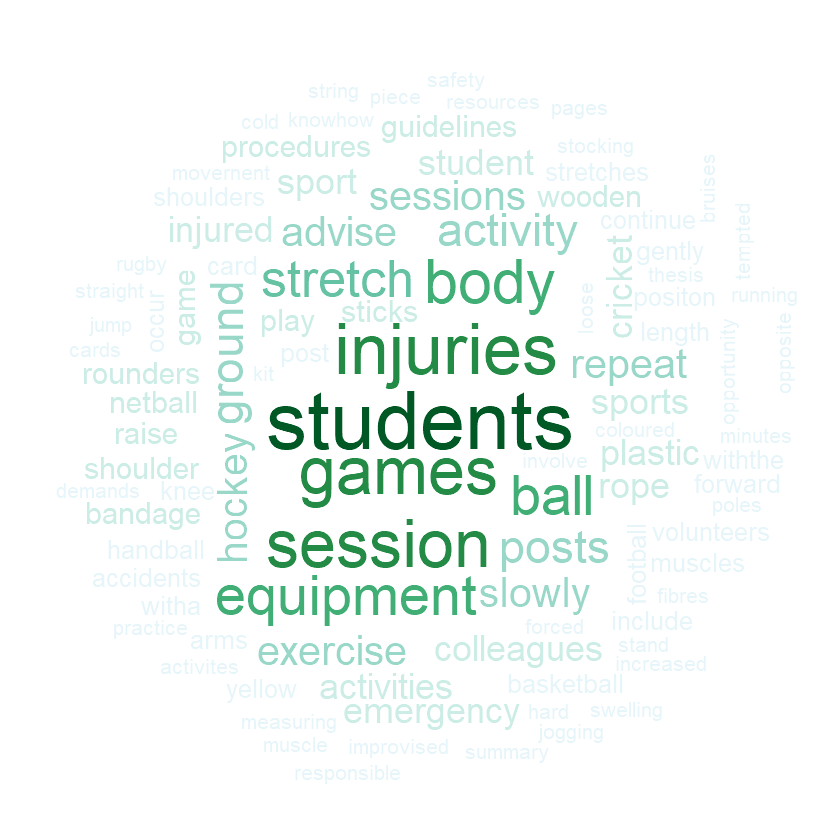

In [14]:

set.seed(1234)
wordcloud(words = table$word, freq = table$freq, min.freq = 1,
          max.words=100, random.order=FALSE, 
          colors=brewer.pal(8, "BuGn"))